In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

In [52]:
# Load the pre-processed dataset
df = pd.read_csv('/content/final_depression_dataset_1.csv')

In [53]:
# Convert categorical columns to numerical
hour_mapping = {'Less than 5 hours': 4.0, '5-6 hours': 5.0, '7-8 hours': 7.0, 'More than 8 hours': 9.0}
diet_mapping = {'Unhealthy': 1, 'Moderate': 2, 'Healthy': 3}
yes_no_mapping = {'Yes': 1, 'No': 0}

df['Work/Study Hours'] = df['Work/Study Hours'].map(hour_mapping)
df['Dietary Habits'] = df['Dietary Habits'].map(diet_mapping)
df['Family History of Mental Illness'] = df['Family History of Mental Illness'].map(yes_no_mapping)
df['Depression'] = df['Depression'].map(yes_no_mapping)

In [54]:
# Define features and target
features = ['Age', 'Work/Study Hours', 'Financial Stress', 'Family History of Mental Illness',
            'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
            'Sleep Duration', 'Dietary Habits']
target = 'Depression'

In [55]:
# Handle missing or non-numeric values
numerical_cols_to_impute_with_mean = ['Age', 'Financial Stress', 'CGPA', 'Sleep Duration']
categorical_cols_to_impute_with_mode = ['Work/Study Hours', 'Family History of Mental Illness', 'Academic Pressure',
                                        'Work Pressure', 'Study Satisfaction', 'Job Satisfaction', 'Dietary Habits']


for column in numerical_cols_to_impute_with_mean:
    df[column] = pd.to_numeric(df[column], errors='coerce')
    if df[column].isnull().any():
        mean_value = df[column].mean()
        df[column] = df[column].fillna(mean_value)
        print(f"Info: Filled missing values in column '{column}' with the mean ({mean_value:.2f}).")

for column in categorical_cols_to_impute_with_mode:
    df[column] = pd.to_numeric(df[column], errors='coerce')
    if df[column].isnull().any():
        mode_result = df[column].mode()
        if not mode_result.empty:
            mode_value = mode_result[0]
            df[column] = df[column].fillna(mode_value)
            print(f"Info: Filled missing values in column '{column}' with the mode ({mode_value}).")
        else:
            print(f"Warning: Could not calculate mode for column '{column}'. Skipping imputation for this column.")


# Handle missing values in the target variable 'Depression'
if df[target].isnull().any():
    # For the target variable, dropping rows with missing values is often preferred
    df.dropna(subset=[target], inplace=True)
    print(f"Info: Dropped rows with missing values in the target variable '{target}'.")

Info: Filled missing values in column 'CGPA' with the mean (7.57).
Info: Filled missing values in column 'Sleep Duration' with the mean (nan).
Info: Filled missing values in column 'Academic Pressure' with the mode (3.0).
Info: Filled missing values in column 'Work Pressure' with the mode (5.0).
Info: Filled missing values in column 'Study Satisfaction' with the mode (4.0).
Info: Filled missing values in column 'Job Satisfaction' with the mode (2.0).


In [62]:
# Load the original dataset and debug
try:
    df = pd.read_csv('final_depression_dataset_1.csv')
    print("Dataset loaded successfully. Shape:", df.shape)
    print("First few rows:\n", df.head())
    print("Unique values in 'Work/Study Hours':", df['Work/Study Hours'].unique())
except FileNotFoundError:
    print("Error: 'final_depression_dataset_1.csv' not found. Please check the file path.")
    exit()
except Exception as e:
    print(f"Error loading dataset: {e}")
    exit()

Dataset loaded successfully. Shape: (2556, 19)
First few rows:
       Name  Gender  Age       City Working Professional or Student  \
0    Pooja  Female   37  Ghaziabad            Working Professional   
1  Reyansh    Male   60     Kalyan            Working Professional   
2    Manvi  Female   42     Bhopal            Working Professional   
3     Isha  Female   44      Thane            Working Professional   
4    Aarav    Male   48     Indore            Working Professional   

          Profession  Academic Pressure  Work Pressure  CGPA  \
0            Teacher                NaN            2.0   NaN   
1  Financial Analyst                NaN            4.0   NaN   
2            Teacher                NaN            2.0   NaN   
3            Teacher                NaN            3.0   NaN   
4     UX/UI Designer                NaN            4.0   NaN   

   Study Satisfaction  Job Satisfaction Sleep Duration Dietary Habits Degree  \
0                 NaN               4.0      7-8 h

In [63]:
# Convert categorical columns to numerical without introducing NaN
hour_mapping = {'Less than 5 hours': 4, '5-6 hours': 5, '7-8 hours': 7, 'More than 8 hours': 9}
diet_mapping = {'Unhealthy': 1, 'Moderate': 2, 'Healthy': 3}
yes_no_mapping = {'Yes': 1, 'No': 0}

In [64]:
# Apply mappings and handle unmatched values by keeping them as is or mapping to a default
df['Work/Study Hours'] = df['Work/Study Hours'].map(hour_mapping).fillna(df['Work/Study Hours'])  # Keep original if unmapped
df['Dietary Habits'] = df['Dietary Habits'].map(diet_mapping).fillna(df['Dietary Habits'])
df['Family History of Mental Illness'] = df['Family History of Mental Illness'].map(yes_no_mapping).fillna(df['Family History of Mental Illness'])
df['Depression'] = df['Depression'].map(yes_no_mapping).fillna(df['Depression'])

In [65]:
# Handle 'Sleep Duration' if it exists and contains strings
if 'Sleep Duration' in df.columns and df['Sleep Duration'].dtype == 'object':
    sleep_mapping = {'Less than 5 hours': 4, '5-6 hours': 5, '7-8 hours': 7, 'More than 8 hours': 9}
    df['Sleep Duration'] = df['Sleep Duration'].map(sleep_mapping).fillna(df['Sleep Duration'])

In [66]:
# Define features and target
features = ['Age', 'Work/Study Hours', 'Financial Stress', 'Family History of Mental Illness',
            'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
            'Sleep Duration', 'Dietary Habits']
target = 'Depression'

In [67]:
# Handle missing or non-numeric values with mode, but only for specific columns
for column in ['Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction']:
    df[column] = pd.to_numeric(df[column], errors='coerce')
    df[column].fillna(0, inplace=True)  # Fill NaN with 0 only for these columns

/tmp/ipython-input-1548736329.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(0, inplace=True)  # Fill NaN with 0 only for these columns


In [68]:
# Verify the pre-processed data
print("\nData types after pre-processing:")
print(df[features].dtypes)
print("\nSample data after pre-processing:")
print(df[features].head())


Data types after pre-processing:
Age                                   int64
Work/Study Hours                    float64
Financial Stress                      int64
Family History of Mental Illness      int64
Academic Pressure                   float64
Work Pressure                       float64
CGPA                                float64
Study Satisfaction                  float64
Job Satisfaction                    float64
Sleep Duration                        int64
Dietary Habits                        int64
dtype: object

Sample data after pre-processing:
   Age  Work/Study Hours  Financial Stress  Family History of Mental Illness  \
0   37               6.0                 2                                 0   
1   60               0.0                 4                                 1   
2   42               0.0                 2                                 0   
3   44               1.0                 2                                 1   
4   48               6.0         

In [69]:
# Prepare data
X = df[features]
y = df[target]

# Check if X and y have data
if X.empty or y.empty:
    print("Error: X or y is empty. Check the dataset and feature selection.")
    exit()

In [70]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Filter Method - Chi-Squared Test:
Selected Features: ['Age', 'Academic Pressure', 'CGPA']
Explanation: Chi-Squared tests the independence of features with the target. It selects the top 3 features based on their statistical significance, requiring non-negative values.


/tmp/ipython-input-319871981.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=chi_scores, y=chi_features, palette="viridis")


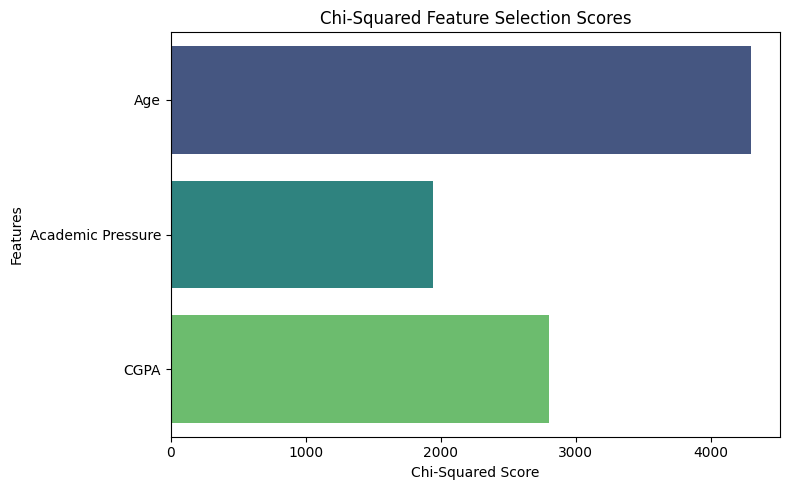

In [85]:
# Method 1: Filter Method - Chi-Squared Test
# Ensure non-negative values for Chi-Squared
X_chi = X - X.min() + 1e-6
selector_chi = SelectKBest(score_func=chi2, k=3)
selector_chi.fit(X_chi, y)
chi_features = X.columns[selector_chi.get_support()].tolist()
print("Filter Method - Chi-Squared Test:")
print(f"Selected Features: {chi_features}")
print("Explanation: Chi-Squared tests the independence of features with the target. It selects the top 3 features based on their statistical significance, requiring non-negative values.")

# Plot for Chi-Squared
plt.figure(figsize=(8, 5))
sns.barplot(x=chi_scores, y=chi_features, palette="viridis")
plt.title('Chi-Squared Feature Selection Scores')
plt.xlabel('Chi-Squared Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


Wrapper Method - Recursive Feature Elimination (RFE):
Selected Features: ['Financial Stress', 'Academic Pressure', 'Work Pressure']
Explanation: RFE recursively removes the least important features using a model (Logistic Regression here). It evaluates feature subsets by training the model and selects the top 3 based on performance.


/tmp/ipython-input-3931095391.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=rfe_df[rfe_df['Feature'].isin(rfe_features)], palette="rocket")


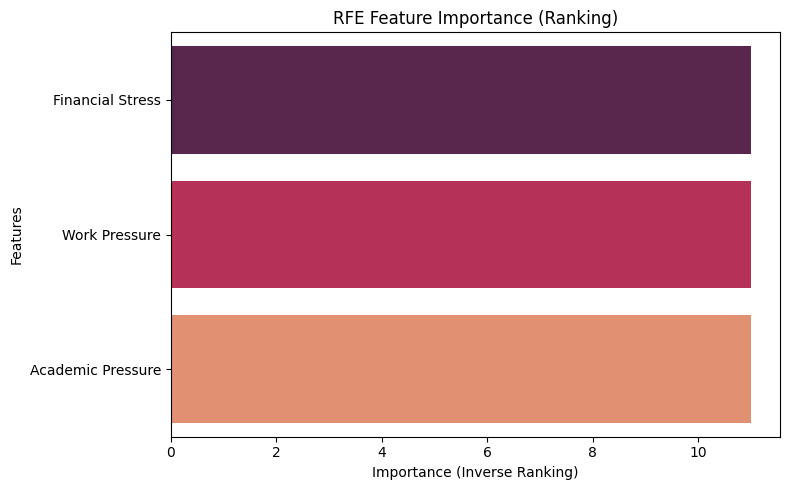

In [86]:
# Method 2: Wrapper Method - Recursive Feature Elimination (RFE) with Logistic Regression
model_rfe = LogisticRegression(random_state=42, max_iter=1000)
rfe = RFE(estimator=model_rfe, n_features_to_select=3, step=1)
rfe.fit(X_train, y_train)
rfe_features = X.columns[rfe.support_].tolist()
print("\nWrapper Method - Recursive Feature Elimination (RFE):")
print(f"Selected Features: {rfe_features}")
print("Explanation: RFE recursively removes the least important features using a model (Logistic Regression here). It evaluates feature subsets by training the model and selects the top 3 based on performance.")

# Plot for RFE (using ranking for all features, inverted for importance)
rfe_importance = len(features) + 1 - rfe_ranking  # Invert ranking to show importance
rfe_df = pd.DataFrame({'Feature': features, 'Importance': rfe_importance})
rfe_df = rfe_df.sort_values('Importance', ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=rfe_df[rfe_df['Feature'].isin(rfe_features)], palette="rocket")
plt.title('RFE Feature Importance (Ranking)')
plt.xlabel('Importance (Inverse Ranking)')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


Embedded Method - L1-based Feature Selection (Lasso):
Selected Features: ['Age', 'Financial Stress', 'Family History of Mental Illness']
Explanation: L1 regularization (Lasso) penalizes less important features to zero, embedding feature selection within the model training. The top 3 non-zero coefficient features are selected.


/tmp/ipython-input-36320100.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=l1_df, palette="magma")


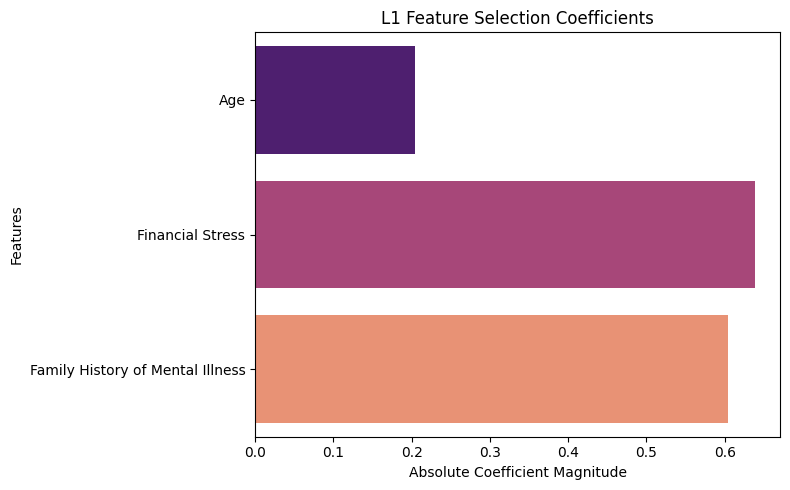

In [87]:
# Method 3: Embedded Method - L1-based Feature Selection (Lasso) with Logistic Regression
model_l1 = LogisticRegression(penalty='l1', solver='liblinear', random_state=42, max_iter=1000)
model_l1.fit(X_train, y_train)
l1_features = X.columns[model_l1.coef_[0] != 0].tolist()
# Ensure at least 3 features, pad with lowest coefficients if needed
if len(l1_features) < 3:
    coef_abs = np.abs(model_l1.coef_[0])
    additional_features = [X.columns[i] for i in np.argsort(coef_abs)[:- (3 - len(l1_features)) - 1:-1] if X.columns[i] not in l1_features]
    l1_features.extend(additional_features[:3 - len(l1_features)])
l1_features = l1_features[:3]
print("\nEmbedded Method - L1-based Feature Selection (Lasso):")
print(f"Selected Features: {l1_features}")
print("Explanation: L1 regularization (Lasso) penalizes less important features to zero, embedding feature selection within the model training. The top 3 non-zero coefficient features are selected.")

# Plot for L1 (using absolute coefficients)
l1_df = pd.DataFrame({'Feature': l1_features, 'Coefficient': l1_coefficients})
plt.figure(figsize=(8, 5))
sns.barplot(x='Coefficient', y='Feature', data=l1_df, palette="magma")
plt.title('L1 Feature Selection Coefficients')
plt.xlabel('Absolute Coefficient Magnitude')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

In [89]:
# Evaluate all methods
def evaluate_method(selected_features):
    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]
    model = LogisticRegression(random_state=42, max_iter=1000)
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)
    return accuracy_score(y_test, y_pred)

chi_accuracy = evaluate_method(chi_features)
rfe_accuracy = evaluate_method(rfe_features)
l1_accuracy = evaluate_method(l1_features)
print(f"\nAccuracy with Chi-Squared Features: {chi_accuracy:.2f}")
print(f"Accuracy with RFE Features: {rfe_accuracy:.2f}")
print(f"Accuracy with L1 Features: {l1_accuracy:.2f}")

# Determine best method
best_method = max([('Chi-Squared', chi_accuracy), ('RFE', rfe_accuracy), ('L1', l1_accuracy)], key=lambda x: x[1])[0]
best_accuracy = max(chi_accuracy, rfe_accuracy, l1_accuracy)
print(f"\nBest Method: {best_method} with accuracy {best_accuracy:.2f}")


Accuracy with Chi-Squared Features: 0.88
Accuracy with RFE Features: 0.88
Accuracy with L1 Features: 0.86

Best Method: RFE with accuracy 0.88
